In [49]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from twelvedata import TDClient
%matplotlib inline

# Initialize Twelve Data client
td = TDClient(apikey="7b5861f61d974edeb58bd9da0cc76789")

ts = td.time_series(
    symbol="GOOG",
    interval="1day",
    outputsize=5000,
    timezone="America/New_York",
)

# Returns pandas.DataFrame
df = ts.as_pandas()
df = df.iloc[::-1]
df.head()

,open,high,low,close,volume
datetime,,,,,
2004-08-19,2.49066,2.59178,2.39004,2.49913,897427216
2004-08-20,2.51582,2.71682,2.50312,2.69764,458857488
2004-08-23,2.75841,2.82641,2.71607,2.72479,366857939
2004-08-24,2.77062,2.77958,2.57958,2.61196,306396159
2004-08-25,2.61420,2.68992,2.58730,2.64010,184645512


In [42]:
df.describe()

,open,high,low,close,volume
count,4934.000000,4934.000000,4934.000000,4934.000000,4.934000e+03
mean,43.033085,43.488305,42.600135,43.052789,1.174286e+08
std,40.268824,40.722709,39.866029,40.300857,1.505428e+08
min,2.470490,2.534000,2.390040,2.490910,1.590750e+05
25%,12.916900,13.045418,12.787070,12.922185,2.807765e+07
50%,26.787305,26.958355,26.570000,26.755000,5.878378e+07
75%,58.835000,59.340000,58.140000,58.777500,1.454240e+08
max,154.009990,155.200000,152.920000,154.840000,1.650833e+09


In [43]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of AAPL")

In [50]:
for i in range(2021,2025):
    print(i, list(df.index.year).count(i))

2021 252
2022 251
2023 250
2024 59


In [51]:
df['MA_for_250_days'] = df['close'].rolling(250).mean()

<Figure size 640x480 with 0 Axes>

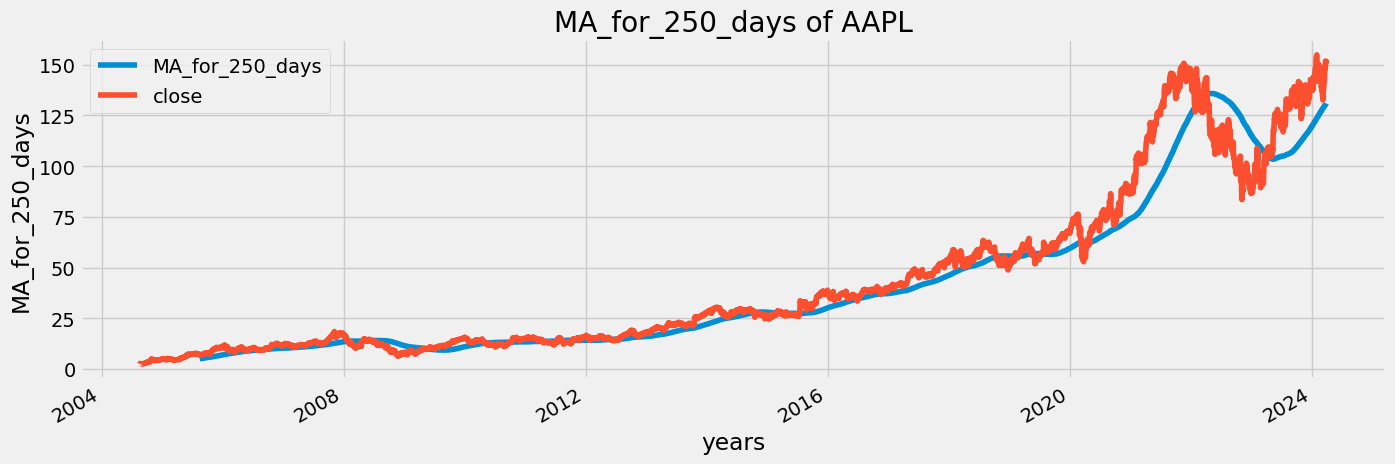

In [53]:
plot_graph((15,5), df[['MA_for_250_days','close']], 'MA_for_250_days')

In [54]:
df['percentage_change'] = df['close'].pct_change()

In [56]:
close_price = df[['close']]
max(close_price.values), min(close_price.values)

(array([154.84]), array([2.49091]))

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[5.39550318e-05],
       [1.35694936e-03],
       [1.53515850e-03],
       ...,
       [9.79848911e-01],
       [9.75779245e-01],
       [9.84181002e-01]])

In [60]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
x_data, y_data = np.array(x_data), np.array(y_data)
x_data[0], y_data[0]

(array([[5.39550318e-05],
        [1.35694936e-03],
        [1.53515850e-03],
        [7.94556764e-04],
        [9.79264136e-04],
        [1.29157319e-03],
        [1.00381302e-03],
        [3.27012127e-04],
        [3.85824425e-04],
        [3.92519575e-05],
        [2.45226276e-04],
        [0.00000000e+00],
        [2.56713053e-04],
        [3.74403287e-04],
        [3.76044255e-04],
        [8.69778743e-04],
        [1.22449041e-03],
        [1.87680806e-03],
        [1.96016924e-03],
        [2.28225846e-03],
        [2.85771316e-03],
        [3.16345834e-03],
        [2.91495013e-03],
        [3.00323422e-03],
        [3.40212075e-03],
        [3.24025565e-03],
        [2.98360824e-03],
        [4.38958972e-03],
        [5.07945272e-03],
        [4.83750838e-03],
        [5.32467900e-03],
        [5.73012940e-03],
        [6.27125505e-03],
        [6.06035783e-03],
        [6.34975896e-03],
        [6.16662692e-03],
        [5.76281749e-03],
        [6.11267189e-03],
        [6.6

In [73]:
# print(int(len(x_data)*0.7))
# print(len(scaled_data)-100-int(len(x_data)*0.7))

splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

3383
1451
(3383, 100, 1)
(3383, 1)
(1451, 100, 1)
(1451, 1)


In [75]:
!pip install --upgrade tensorflow keras

  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 10.4 MB/s eta 0:00:00
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.3/273.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting u

In [77]:
model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epoch=2)

NameError: name 'Sequential' is not defined

In [ ]:
predictions = model.predict(x_test)